In [293]:
from multiprocessing import Pool
import json

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import time
import pickle
import glob

pd.set_option('display.max_columns', 0)

In [3]:
user_reviews = pd.read_json("User_Review_over_5_v1.json")
wine_meta = pd.read_json("Wine_Meta.json")

In [296]:
user_reviews = user_reviews.drop_duplicates(subset=['vintage_id', 'userID']).reset_index()

,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url
0,Soooo good 💕,4.0,164942680,0,19484511,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
1,"Belíssimo champanhe rose, bem seco mais com mu...",4.0,164942680,2,352674,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
2,"Caramel, cherry, woody and oxidized.",1.5,164942680,8,2148498,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
3,Fine example of a great basic NV. Lovely stuff!,4.5,164942680,0,3450270,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
4,,4.0,164942680,0,17786617,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
...,...,...,...,...,...,...,...,...
1020782,"White peach, orange blossom and melon. Very ho...",4.0,2435472,0,11274168,63654,Gewürztraminer Alsacen2012,/trimbach-alsace-gewurztraminer-alsace/w/63654...
1020783,Fat chewy and buttery,4.5,2293611,1,11274168,5602,Chardonnayn2013,/rombauer-vineyards-chardonnay/w/5602?year=2013
1020784,,3.0,8169599,0,11274168,1396664,Cabernet Sauvignonn2012,/ca-nani-cabernet-sauvignon-napa-valley-red-wi...
1020785,,4.0,1590767,1,11274168,1218423,RosénN.V.,/lillet-rose-bordeaux/w/1218423?year=N.V.


In [16]:
user_reviews[user_reviews.isna().any(axis=1)]

,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url


In [269]:
train[train.rating_per_user == 4].user_note

0                                              Soooo good 💕
1         Belíssimo champanhe rose, bem seco mais com mu...
5         quite a fruit forward style 45% PN, 30% Chardo...
6         Had it at Caviar Bar in St.Petersburg: totally...
8                                  Strawberry flavor strong
                                ...                        
690689    Still tastes a little young but has a lot of p...
690707                                Heavy dark ripe fruit
690709            Typical vegetative New Zealand sauv blanc
690711    White peach, orange blossom and melon. Very ho...
690714                                                     
Name: user_note, Length: 263751, dtype: object

In [270]:
user_rating_mean = train.groupby(['userID']).rating_per_user.mean()

In [290]:
user_std_test = test.groupby(['userID']).rating_per_user.std()
user_mean_test = test.groupby(['userID']).rating_per_user.mean()

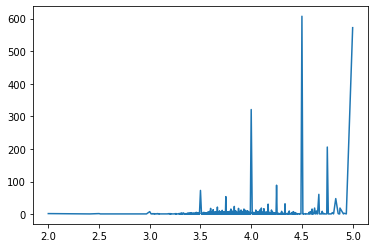

In [292]:
user_mean_test.value_counts().sort_index().plot()

In [281]:
user_std = train.groupby(['userID']).rating_per_user.std()

In [285]:
user_std[user_std == 0].index

Int64Index([  186179,   278189,   287238,   366630,   389583,   460389,
              461621,   562338,   572491,   573054,
            ...
            31834292, 31924287, 32985802, 34770903, 37325513, 37858406,
            39773462, 43326368, 43644291, 45350476],
           dtype='int64', name='userID', length=155)

In [288]:
user_rating_mean[user_std[user_std == 0].index].value_counts()

5.0    108
4.5     44
4.0      3
Name: rating_per_user, dtype: int64

In [279]:
user_rating_mean.sort_values().value_counts()

4.500000    235
4.750000    121
5.000000    108
4.666667     83
4.625000     75
           ... 
3.969799      1
4.764706      1
3.778646      1
4.552083      1
4.452381      1
Name: rating_per_user, Length: 3843, dtype: int64

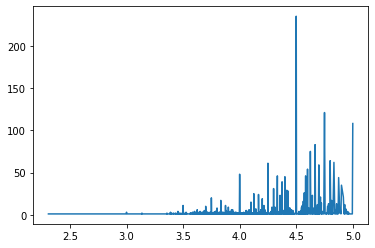

In [278]:
user_rating_mean.sort_values().value_counts().sort_index().plot()

In [277]:
user_rating_mean.sort_values().value_counts().sort_index()

2.309677      1
2.490446      1
2.541096      1
2.637584      1
2.644231      1
           ... 
4.978022      1
4.979167      1
4.980000      1
4.996032      1
5.000000    108
Name: rating_per_user, Length: 3843, dtype: int64

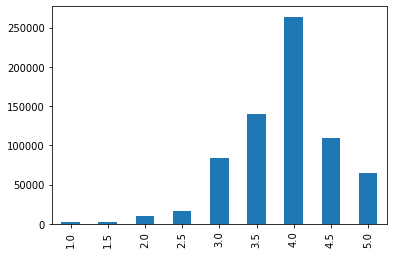

In [267]:
train.rating_per_user.value_counts().sort_index().plot.bar()

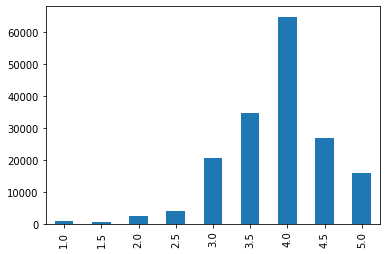

In [266]:
test.rating_per_user.value_counts().sort_index().plot.bar()

In [28]:
foods = json.loads('{"foods":[{"id":5,"name":"Pasta","background_image":{"location":"//images.vivino.com/backgrounds/foods/5_pasta.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/5_pasta_932x810.png"}},"seo_name":null},{"id":8,"name":"Lamb","background_image":{"location":"//images.vivino.com/backgrounds/foods/8_lamb.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/8_lamb_932x810.png"}},"seo_name":"lamb"},{"id":9,"name":"Veal","background_image":{"location":"//images.vivino.com/backgrounds/foods/9_veal.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/9_veal_932x810.png"}},"seo_name":"veal"},{"id":15,"name":"Spicy food","background_image":{"location":"//images.vivino.com/backgrounds/foods/15_spicyfood.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/15_spicyfood_932x810.png"}},"seo_name":"spicy-food"},{"id":39,"name":"Goat cheese","background_image":{"location":"//images.vivino.com/backgrounds/foods/39_goatcheese.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/39_goatcheese_932x810.png"}},"seo_name":null},{"id":4,"name":"Beef","background_image":{"location":"//images.vivino.com/backgrounds/foods/4_beef.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/4_beef_932x810.png"}},"seo_name":"beef"},{"id":11,"name":"Game (deer, venison)","background_image":{"location":"//images.vivino.com/backgrounds/foods/11_venison.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/11_venison_932x810.png"}},"seo_name":"game"},{"id":12,"name":"Rich fish (salmon, tuna etc)","background_image":{"location":"//images.vivino.com/backgrounds/foods/12_richfish.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/12_richfish_932x810.png"}},"seo_name":null},{"id":16,"name":"Sweet desserts","background_image":{"location":"//images.vivino.com/backgrounds/foods/16_sweetdessert.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/16_sweetdessert_932x810.png"}},"seo_name":null},{"id":37,"name":"Fruity desserts","background_image":{"location":"//images.vivino.com/backgrounds/foods/37_fruitydessert.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/37_fruitydessert_932x810.png"}},"seo_name":null},{"id":38,"name":"Blue cheese","background_image":{"location":"//images.vivino.com/backgrounds/foods/38_bluecheese.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/38_bluecheese_932x810.png"}},"seo_name":null},{"id":10,"name":"Pork","background_image":{"location":"//images.vivino.com/backgrounds/foods/10_pork.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/10_pork_932x810.png"}},"seo_name":"pork"},{"id":19,"name":"Vegetarian","background_image":{"location":"//images.vivino.com/backgrounds/foods/19_vegetarian.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/19_vegetarian_932x810.png"}},"seo_name":"vegetarian"},{"id":20,"name":"Poultry","background_image":{"location":"//images.vivino.com/backgrounds/foods/20_chicken.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/20_chicken_932x810.png"}},"seo_name":"poultry"},{"id":28,"name":"Lean fish","background_image":{"location":"//images.vivino.com/backgrounds/foods/28_leanfish.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/28_leanfish_932x810.png"}},"seo_name":null},{"id":34,"name":"Mushrooms","background_image":{"location":"//images.vivino.com/backgrounds/foods/34_mushrooms.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/34_mushrooms_932x810.png"}},"seo_name":null},{"id":41,"name":"Cured Meat","background_image":{"location":"//images.vivino.com/backgrounds/foods/41_curedmeat.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/41_curedmeat_932x810.png"}},"seo_name":null},{"id":13,"name":"Shellfish","background_image":{"location":"//images.vivino.com/backgrounds/foods/13_shellfish.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/13_shellfish_932x810.png"}},"seo_name":"shellfish"},{"id":17,"name":"Mature and hard cheese","background_image":{"location":"//images.vivino.com/backgrounds/foods/17_hardcheese.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/17_hardcheese_932x810.png"}},"seo_name":null},{"id":21,"name":"Any junk food will do","background_image":{"location":"//images.vivino.com/backgrounds/foods/21_junkfood.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/21_junkfood_932x810.png"}},"seo_name":null},{"id":27,"name":"Appetizers and snacks","background_image":{"location":"//images.vivino.com/backgrounds/foods/27_appetizers-snacks.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/27_appetizers-snacks_932x810.png"}},"seo_name":null},{"id":35,"name":"Mild and soft cheese","background_image":{"location":"//images.vivino.com/backgrounds/foods/35_softcheese.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/35_softcheese_932x810.png"}},"seo_name":null},{"id":40,"name":"Aperitif","background_image":{"location":"//images.vivino.com/backgrounds/foods/40_aperitif.png","variations":{"small":"//images.vivino.com/backgrounds/foods/thumbs/40_aperitif_932x810.png"}},"seo_name":null}]}')

In [32]:
[food['name'] for food in foods['foods']]

['Pasta',
 'Lamb',
 'Veal',
 'Spicy food',
 'Goat cheese',
 'Beef',
 'Game (deer, venison)',
 'Rich fish (salmon, tuna etc)',
 'Sweet desserts',
 'Fruity desserts',
 'Blue cheese',
 'Pork',
 'Vegetarian',
 'Poultry',
 'Lean fish',
 'Mushrooms',
 'Cured Meat',
 'Shellfish',
 'Mature and hard cheese',
 'Any junk food will do',
 'Appetizers and snacks',
 'Mild and soft cheese',
 'Aperitif']

In [33]:
len([food['name'] for food in foods['foods']])

23

In [36]:
def open_json(filename):
    with open(filename, 'rb') as f:
        data = json.load(f)
    return data

In [ ]:
open_json('grapes.json')

In [37]:
wine_ids = open_json('wine_styles.json')

In [41]:
# wine_ids['wine_styles']

In [19]:
important_columns = ['name', 'wine_id', 'rating_count', 'rating_average',
       'rating_distribution', 'label_count', 'review_count', 'type_id', 'body',
       'acidity', 'alcohol', 'food', 'grapes', 'grapes_id', 'grapes_count',
       'grape_composition', 'rank', 'region_id', 'region_name', 'country_code',
       'country_most_used_grapes_id', 'country_most_used_grapes_name',
       'country_most_used_grapes_wines_count', 'winery_id', 'winery_name',
       'winery_ratings_count', 'winery_ratings_average', 'winery_labels_count',
       'winery_wines_count']

In [42]:
wine_meta.type_id.value_counts()

1     35128
2     10951
3      2723
4      1003
7       542
24      469
25       48
Name: type_id, dtype: int64

In [218]:
# wine_meta[wine_meta.type_id == 25]

In [255]:
user_reviews.shape

(1020787, 8)

## Train / Test 셋 분리

1. User의 리뷰 5개 이상 -> 20%

In [297]:
user_review2 = user_reviews.drop_duplicates(subset=['vintage_id', 'userID'], keep='first').reset_index(drop=True)

In [298]:
user_review2.shape

(984115, 8)

In [299]:
user_review_freq = user_review2.userID.value_counts()

In [300]:
user_review_freq.shape

(37445,)

In [301]:
user_review_freq[user_review_freq >= 5].sum() * 0.2 // 1

188819.0

In [302]:
user_ids_over_5 = user_review_freq[user_review_freq >= 5].index.values
print("5개 이상 리뷰 남긴 사람 수: ", user_ids_over_5.shape[0])

5개 이상 리뷰 남긴 사람 수:  6343


In [303]:
user_review_2 = user_review2[user_review2.userID.isin(user_ids_over_5)]

In [304]:
def split_test_data(df, test_ratio = 0.2):
    return df.sample(frac=test_ratio).reset_index(drop=True)

In [305]:
user_review_2 = user_review_2.reset_index()

In [307]:
# user_review_2

In [308]:
# user_std_test = test.groupby(['userID']).rating_per_user.std()
# user_mean_test = test.groupby(['userID']).rating_per_user.mean()

,index,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url
0,0,Soooo good 💕,4.0,164942680,0,19484511,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
1,1,"Belíssimo champanhe rose, bem seco mais com mu...",4.0,164942680,2,352674,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
2,2,"Caramel, cherry, woody and oxidized.",1.5,164942680,8,2148498,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
3,3,Fine example of a great basic NV. Lovely stuff!,4.5,164942680,0,3450270,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
4,4,,4.0,164942680,0,17786617,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...
...,...,...,...,...,...,...,...,...,...
944094,984110,"White peach, orange blossom and melon. Very ho...",4.0,2435472,0,11274168,63654,Gewürztraminer Alsacen2012,/trimbach-alsace-gewurztraminer-alsace/w/63654...
944095,984111,Fat chewy and buttery,4.5,2293611,1,11274168,5602,Chardonnayn2013,/rombauer-vineyards-chardonnay/w/5602?year=2013
944096,984112,,3.0,8169599,0,11274168,1396664,Cabernet Sauvignonn2012,/ca-nani-cabernet-sauvignon-napa-valley-red-wi...
944097,984113,,4.0,1590767,1,11274168,1218423,RosénN.V.,/lillet-rose-bordeaux/w/1218423?year=N.V.


In [309]:
test = user_review_2.groupby(['userID']).apply(split_test_data)

In [310]:
test = test.reset_index(drop=True)

In [311]:
test.shape

(188718, 9)

In [312]:
test_index = test['index'].values

In [313]:
test['index'].nunique()

188718

In [314]:
test

,index,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url
0,932958,90p,4.0,2999861,3,1201,1214547,Chablis Premier Cru 'Montée de Tonnerre'n2011,/raveneau-chablis-premier-cru-montee-de-tonner...
1,932927,93-94p,4.0,2434772,4,1201,1099253,Vosne-Romanée 1er Cru Cros Parantouxn2008,/rouget-emmanuel-vosne-romanee-1er-cru-cros-pa...
2,932983,92p,4.0,3083114,1,1201,1684223,Pauillac (Premier Grand Cru Classé)n1998,/chateau-mouton-rothschild-pauillac-premier-gr...
3,932929,95p :-),5.0,2221950,4,1201,100044,Chambolle-Musigny 1er Cru 'Amoureuses'n2007,/domaine-g-roumier-chambolle-musigny-1er-cru-a...
4,932907,96p,5.0,2309050,6,1201,1107909,La Sereine Noire Côte-Rôtien1999,/domaine-gangloff-la-sereine-noire-cote-rotie/...
...,...,...,...,...,...,...,...,...,...
188713,931874,Muy elegante presentación y mejor sabor. Muy b...,4.0,6580165,0,46404017,1155203,Gên2013,/emiliana-ge/w/1155203?year=2013
188714,931979,"Es un vino impresionante, ya sea en sus sabore...",4.0,142749808,0,46404017,4382344,Patriarchn2012,/frank-family-patriarch-rutherford-red-wine/w/...
188715,931878,Cáscaras de frutas cítricas se perciben en nar...,2.5,7768416,0,46404017,1104850,Gran Reservan2011,/monasterio-de-las-vinas-gran-reserva/w/110485...
188716,931948,"Grandiosos el caucho, el cuero, la vainilla pr...",3.0,11447579,0,46404017,1981888,Rougen2013,/chateau-copsa-rouge/w/1981888?year=2013


In [315]:
user_review_2.wine_id.value_counts()[user_review_2.wine_id.value_counts() > 4]

1652       1425
86684      1401
5078       1393
66284      1272
1684223    1257
           ... 
1127590       5
1270305       5
1262137       5
6629764       5
2062542       5
Name: wine_id, Length: 49459, dtype: int64

In [316]:
train = user_review_2[~user_review_2.index.isin(test_index)].reset_index(drop=True)

In [317]:
user_review_2.to_json('RAW_v2_201130.json')

## T/F Binary

In [318]:
user_std = train.groupby(['userID']).rating_per_user.std()
user_mean = train.groupby(['userID']).rating_per_user.mean()

In [321]:
user_std[user_std == 0].index

Int64Index([  107276,   186179,   192972,   239946,   278189,   287238,
              361797,   389092,   389583,   419433,
            ...
            34770903, 37858406, 39773462, 41672848, 41901650, 41968030,
            43326368, 43644291, 45350476, 46356698],
           dtype='int64', name='userID', length=166)

In [329]:
std_zeros = user_std[user_std == 0].index

In [340]:
test[test.userID.isin(std_zeros)].groupby('userID').rating_per_user.mean()

userID
107276      5.0
186179      5.0
192972      4.0
239946      4.5
278189      5.0
           ... 
41968030    4.5
43326368    5.0
43644291    5.0
45350476    4.5
46356698    5.0
Name: rating_per_user, Length: 166, dtype: float64

In [328]:
user_mean[user_std[user_std == 0].index]

5.0    115
4.5     45
4.0      6
Name: rating_per_user, dtype: int64

In [343]:
like = []
for userId, rating in tqdm(zip(train.userID, train.rating_per_user)):
    if userId in std_zeros:
        like.append(1)
        continue
        
    if rating > user_mean[userId]:
        like.append(1)
        
    else:
        like.append(0)

In [344]:
len(like)

763387

In [345]:
train['like'] = like

In [352]:
std_zeros_set = set(std_zeros.tolist())

In [355]:
like = []
for userId, rating in tqdm(zip(test.userID, test.rating_per_user)):
    if (userId in std_zeros_set) and (rating > user_mean[userId]):
        like.append(1)
        continue
        
    elif (userId in std_zeros_set) and (rating <= user_mean[userId]):
        like.append(0)
        continue
        
    if rating > user_mean[userId]:
        like.append(1)
        
    else:
        like.append(0)

In [356]:
test['like'] = like

In [366]:
train.userID.value_counts()[train.userID.value_counts() == 1].index

Int64Index([27313372, 24703790], dtype='int64')

In [479]:
# train.userID.value_counts()[train.userID.value_counts() == 1]

In [488]:
train

,index,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url,like
0,0,Soooo good 💕,4.0,164942680,0,19484511,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
1,1,"Belíssimo champanhe rose, bem seco mais com mu...",4.0,164942680,2,352674,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
2,4,,4.0,164942680,0,17786617,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
3,5,Perfekt med gratinerede østers.,4.5,164942680,0,8078038,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
4,6,Delicious!,4.0,164942680,0,3014532,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,0
...,...,...,...,...,...,...,...,...,...,...
763382,984107,Delicate apple and pear,3.0,26158025,0,11274168,87064,Morgadio Albariñon2014,/campante-morgadio-albarino/w/87064?year=2014,0
763383,984110,"White peach, orange blossom and melon. Very ho...",4.0,2435472,0,11274168,63654,Gewürztraminer Alsacen2012,/trimbach-alsace-gewurztraminer-alsace/w/63654...,1
763384,984111,Fat chewy and buttery,4.5,2293611,1,11274168,5602,Chardonnayn2013,/rombauer-vineyards-chardonnay/w/5602?year=2013,1
763385,984112,,3.0,8169599,0,11274168,1396664,Cabernet Sauvignonn2012,/ca-nani-cabernet-sauvignon-napa-valley-red-wi...,0


In [489]:
test

,index,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url,like
0,932958,90p,4.0,2999861,3,1201,1214547,Chablis Premier Cru 'Montée de Tonnerre'n2011,/raveneau-chablis-premier-cru-montee-de-tonner...,0
1,932927,93-94p,4.0,2434772,4,1201,1099253,Vosne-Romanée 1er Cru Cros Parantouxn2008,/rouget-emmanuel-vosne-romanee-1er-cru-cros-pa...,0
2,932983,92p,4.0,3083114,1,1201,1684223,Pauillac (Premier Grand Cru Classé)n1998,/chateau-mouton-rothschild-pauillac-premier-gr...,0
3,932929,95p :-),5.0,2221950,4,1201,100044,Chambolle-Musigny 1er Cru 'Amoureuses'n2007,/domaine-g-roumier-chambolle-musigny-1er-cru-a...,1
4,932907,96p,5.0,2309050,6,1201,1107909,La Sereine Noire Côte-Rôtien1999,/domaine-gangloff-la-sereine-noire-cote-rotie/...,1
...,...,...,...,...,...,...,...,...,...,...
188713,931874,Muy elegante presentación y mejor sabor. Muy b...,4.0,6580165,0,46404017,1155203,Gên2013,/emiliana-ge/w/1155203?year=2013,1
188714,931979,"Es un vino impresionante, ya sea en sus sabore...",4.0,142749808,0,46404017,4382344,Patriarchn2012,/frank-family-patriarch-rutherford-red-wine/w/...,1
188715,931878,Cáscaras de frutas cítricas se perciben en nar...,2.5,7768416,0,46404017,1104850,Gran Reservan2011,/monasterio-de-las-vinas-gran-reserva/w/110485...,0
188716,931948,"Grandiosos el caucho, el cuero, la vainilla pr...",3.0,11447579,0,46404017,1981888,Rougen2013,/chateau-copsa-rouge/w/1981888?year=2013,0


In [498]:
test.to_json('test_v2_201130.json')

In [499]:
train.to_json('train_v2_201130.json')

In [490]:
wine_meta

,name,wine_id,rating_count,rating_average,rating_distribution,label_count,review_count,type_id,body,acidity,alcohol,food,grapes,grapes_id,grapes_count,grape_composition,rank,region_id,region_name,country_code,country_most_used_grapes_id,country_most_used_grapes_name,country_most_used_grapes_wines_count,winery_id,winery_name,winery_ratings_count,winery_ratings_average,winery_labels_count,winery_wines_count,location,vintages_id,vintages_year,vintages_stat,wine_maker_id,wine_maker_name,winery_group_id,winery_group_name,winery_group_website
0,1882 Cabernet Sauvignon,1938520,1697,4.1,"{'1': 11, '2': 26, '3': 315, '4': 1060, '5': 286}",14879,16,1,5.0,2.0,14.5,"[Beef, Lamb, Game (deer, venison), Mature and ...",[Cabernet Sauvignon],[2],[687800],{'2': 100},{'country': {'description': 'Rank within Unite...,105.0,Rutherford,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",2412.0,Inglenook,18888.0,4.3,121618.0,62.0,None,"[3421234, 158245193, 155874707, 103145371, 905...","[U.V., 2018, 2017, 2016, 2015, 2014, 2013, 201...","[{'status': 'Normal', 'ratings_count': 1698, '...",1076.0,John Richburg,290.0,Inglenook,https://www.inglenook.com/
1,Les Bessards Hermitage,14604,1078,4.3,"{'1': 12, '2': 13, '3': 95, '4': 625, '5': 333}",5370,3,1,5.0,3.0,14.0,"[Beef, Lamb, Game (deer, venison), Poultry]",[Shiraz/Syrah],[1],[467266],{'1': 100},{'country': {'description': 'Rank within Franc...,535.0,Hermitage,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",7636.0,Delas,72079.0,3.8,462021.0,57.0,"{'latitude': 45.073578, 'longitude': 4.803883}","[1815490, 157965835, 154624938, 119351590, 535...","[U.V., 2018, 2017, 2016, 2015, 2014, 2013, 201...","[{'status': 'Normal', 'ratings_count': 1078, '...",NaN,None,816.0,Louis Roederer,http://www.louis-roederer.com/
2,Patriarch Estate Grown,1930757,1072,4.6,"{'1': 1, '2': 4, '3': 53, '4': 438, '5': 576}",6042,25,1,4.0,3.0,14.2,"[Beef, Lamb, Veal, Poultry]","[Cabernet Sauvignon, Merlot]","[2, 10]","[687800, 482768]",{},{'country': {'description': 'Rank within Unite...,88.0,Stags Leap District,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",1905.0,Regusci,7747.0,4.4,49362.0,21.0,"{'latitude': 38.391342, 'longitude': -122.31935}","[3509933, 151540809, 142414712, 31112216, 3558...","[U.V., 2017, 2016, 2015, 2014, 2013, 2012, 201...","[{'status': 'Normal', 'ratings_count': 1072, '...",1048.0,Jim Regusci,NaN,None,None
3,Merlot,1564280,3577,4.3,"{'1': 15, '2': 28, '3': 351, '4': 2182, '5': 1...",18748,52,1,4.0,3.0,14.4,"[Beef, Lamb, Veal]",[Merlot],[10],[482768],"{'10': 100, '2': 0}",{'country': {'description': 'Rank within Unite...,24.0,California,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",1297.0,Pride Mountain Vineyards,14091.0,4.4,83324.0,19.0,"{'latitude': 38.527122, 'longitude': -122.564865}","[2333460, 166176534, 156610160, 150560979, 140...","[U.V., 2019, 2018, 2017, 2016, 2015, 2014, 201...","[{'status': 'Normal', 'ratings_count': 3577, '...",784.0,Sally Johnson,NaN,None,None
4,Cabernet Sauvignon F Block,2576427,115,4.4,"{'1': 0, '2': 3, '3': 7, '4': 58, '5': 47}",806,1,1,5.0,2.0,0.0,"[Beef, Lamb, Game (deer, venison), Mature and ...",[Cabernet Sauvignon],[2],[687800],{},{'country': {'description': 'Rank within Unite...,42.0,Oakville,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",2232.0,Kelham,1077.0,4.4,7749.0,18.0,"{'latitude': 38.489895, 'longitude': -122.4361}","[10146971, 148289557, 144745441, 146765402, 11...","[U.V., 2016, 2015, 2014, 2012, 2011, 2009, 200...","[{'status': 'Normal', 'ratings_count': 115, 'r...",NaN,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,Dadà Langhe Chardonnay,1861275,231,3.8,"{'1': 3, '2': 11, '3': 85, '4': 109, '5': 23}",961,6,2,3.0,3.0,13.5,"[Pasta

In [491]:
user_meta

,userID,user_follower_count,user_following_count,user_rating_count,user_rating_sum,reviews_count
0,5145589,5364.0,2409.0,16610.0,58885.0,16469.0
1,2430463,3839.0,1157.0,14920.0,51877.5,14631.0
2,2867095,22586.0,5000.0,11441.0,39024.5,11422.0
3,248277,8856.0,1448.0,12502.0,46875.0,11285.0
4,11195950,1738.0,4.0,11530.0,42361.0,11266.0
...,...,...,...,...,...,...
52251,22784366,1.0,4.0,1.0,1.0,0.0
52252,4465516,0.0,0.0,0.0,0.0,0.0
52253,13591414,0.0,0.0,1.0,5.0,0.0
52254,4870982,0.0,0.0,0.0,0.0,0.0


In [202]:
wine_meta2 = wine_meta.iloc[:,:-9]

In [492]:
wine_meta2.shape

(50860, 29)

In [493]:
wine_meta2.wine_id.nunique()

50860

In [213]:
wine_meta2.wine_id

0        1938520
1          14604
2        1930757
3        1564280
4        2576427
          ...   
50858    1669561
50859    1861275
50860    2201892
50861    2396179
50863    7715684
Name: wine_id, Length: 50860, dtype: int64

In [215]:
wine_meta2 = wine_meta2.drop_duplicates(subset=['wine_id']).reset_index(drop=True)

In [220]:
wine_meta2

,name,wine_id,rating_count,rating_average,rating_distribution,label_count,review_count,type_id,body,acidity,alcohol,food,grapes,grapes_id,grapes_count,grape_composition,rank,region_id,region_name,country_code,country_most_used_grapes_id,country_most_used_grapes_name,country_most_used_grapes_wines_count,winery_id,winery_name,winery_ratings_count,winery_ratings_average,winery_labels_count,winery_wines_count
0,1882 Cabernet Sauvignon,1938520,1697,4.1,"{'1': 11, '2': 26, '3': 315, '4': 1060, '5': 286}",14879,16,1,5.0,2.0,14.5,"[Beef, Lamb, Game (deer, venison), Mature and ...",[Cabernet Sauvignon],[2],[687800],{'2': 100},{'country': {'description': 'Rank within Unite...,105.0,Rutherford,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",2412.0,Inglenook,18888.0,4.3,121618.0,62.0
1,Les Bessards Hermitage,14604,1078,4.3,"{'1': 12, '2': 13, '3': 95, '4': 625, '5': 333}",5370,3,1,5.0,3.0,14.0,"[Beef, Lamb, Game (deer, venison), Poultry]",[Shiraz/Syrah],[1],[467266],{'1': 100},{'country': {'description': 'Rank within Franc...,535.0,Hermitage,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",7636.0,Delas,72079.0,3.8,462021.0,57.0
2,Patriarch Estate Grown,1930757,1072,4.6,"{'1': 1, '2': 4, '3': 53, '4': 438, '5': 576}",6042,25,1,4.0,3.0,14.2,"[Beef, Lamb, Veal, Poultry]","[Cabernet Sauvignon, Merlot]","[2, 10]","[687800, 482768]",{},{'country': {'description': 'Rank within Unite...,88.0,Stags Leap District,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",1905.0,Regusci,7747.0,4.4,49362.0,21.0
3,Merlot,1564280,3577,4.3,"{'1': 15, '2': 28, '3': 351, '4': 2182, '5': 1...",18748,52,1,4.0,3.0,14.4,"[Beef, Lamb, Veal]",[Merlot],[10],[482768],"{'10': 100, '2': 0}",{'country': {'description': 'Rank within Unite...,24.0,California,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",1297.0,Pride Mountain Vineyards,14091.0,4.4,83324.0,19.0
4,Cabernet Sauvignon F Block,2576427,115,4.4,"{'1': 0, '2': 3, '3': 7, '4': 58, '5': 47}",806,1,1,5.0,2.0,0.0,"[Beef, Lamb, Game (deer, venison), Mature and ...",[Cabernet Sauvignon],[2],[687800],{},{'country': {'description': 'Rank within Unite...,42.0,Oakville,us,"[2, 14, 5]","[Cabernet Sauvignon, Pinot Noir, Chardonnay]","[687800, 483935, 510440]",2232.0,Kelham,1077.0,4.4,7749.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50855,Garganega - Pinot Grigio,1669561,788,3.5,"{'1': 11, '2': 60, '3': 407, '4': 251, '5': 59}",6635,9,2,3.0,3.0,0.0,"[Pasta, Shellfish, Mature and hard cheese, Lea...","[Garganega, Pinot Grigio]","[104, 34]","[7671, 42695]",{},{'country': {'description': 'Rank within Franc...,983.0,delle Venezie,it,"[16, 10, 5]","[Sangiovese, Merlot, Chardonnay]","[108135, 482768, 510440]",19962.0,Marks & Spencer,64503.0,3.4,675950.0,517.0
50856,Dadà Langhe Chardonnay,1861275,231,3.8,"{'1': 3, '2': 11, '3': 85, '4': 109, '5': 23}",961,6,2,3.0,3.0,13.5,"[Pasta, Shellfish, Mature and hard cheese, Lea...",[Chardonnay],[5],[510440],{'5': 100},{'country': {'description': 'Rank within Italy...,613.0,Langhe,it,"[16, 10, 5]","[Sangiovese, Merlot, Chardonnay]","[108135, 482768, 510440]",17655.0,Negretti,2573.0,3.9,12719.0,13.0
50857,Metodo Zero Prosecco Extra Dry,2201892,390,3.9,"{'1': 2, '2': 11, '3': 114, '4': 220, '5': 43}",1983,14,3,1.0,3.0,0.0,"[Shellfish, Vegetarian, Appetizers and snacks,...",[Glera (Prosecco)],[112],[22913],{},{'country': {'description': 'Rank within Italy...,3232.0,Prosecco,it,"[16, 10, 5]","[Sangiovese, Merlot, Chardonnay]","[108135, 482768, 510440]",13763.0,De Stefani,7521.0,4.0,42703.0,49.0
50858,Les Monts Damnés Sancerre,2396179,302,4.2,"{'1': 0, '2': 4, '3': 52, '4': 194, '5': 52}",730,4,2,4.0,3.0,13.5,"[Pork, Shellfish, Spicy food, Vegetarian, Goat...",[Sauvignon Blanc],[17],[246230],{},{'country': {'description': 'Rank within Franc...,635.0,Sancerre,fr,"[14, 1

In [224]:
review = pd.read_json('review_vintage_id_261976.json')

In [228]:
user_meta = review[['userID', 'user_follower_count', 'user_following_count', 'user_rating_count', 'user_rating_sum', 'reviews_count']]

In [233]:
user_meta

,userID,user_follower_count,user_following_count,user_rating_count,user_rating_sum,reviews_count
0,12287760,2.0,5.0,352.0,1282.0,215.0
1,579752,958.0,64.0,2460.0,8050.0,2444.0
2,965583,402.0,853.0,436.0,1491.0,324.0
3,20880779,7.0,10.0,315.0,1222.0,150.0
4,24068906,4.0,1.0,89.0,395.0,83.0
...,...,...,...,...,...,...
261971,5293486,960.0,301.0,6652.0,24965.5,6560.0
261972,2483751,277.0,189.0,1349.0,5404.5,1298.0
261973,37249519,1.0,0.0,74.0,301.5,64.0
261974,43215761,1.0,0.0,26.0,122.5,20.0


In [237]:
user_meta = user_meta.sort_values('reviews_count',ascending=False).drop_duplicates(subset=['userID']).reset_index(drop=True)

In [242]:
user_meta.iloc[:-1,:].to_json('User_Meta_v1_201129.json')

In [222]:
train.shape

(690716, 9)

In [496]:
train

,index,user_note,rating_per_user,vintage_id,user_like_count,userID,wine_id,wine_name,url,like
0,0,Soooo good 💕,4.0,164942680,0,19484511,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
1,1,"Belíssimo champanhe rose, bem seco mais com mu...",4.0,164942680,2,352674,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
2,4,,4.0,164942680,0,17786617,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
3,5,Perfekt med gratinerede østers.,4.5,164942680,0,8078038,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,1
4,6,Delicious!,4.0,164942680,0,3014532,1141133,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,0
...,...,...,...,...,...,...,...,...,...,...
763382,984107,Delicate apple and pear,3.0,26158025,0,11274168,87064,Morgadio Albariñon2014,/campante-morgadio-albarino/w/87064?year=2014,0
763383,984110,"White peach, orange blossom and melon. Very ho...",4.0,2435472,0,11274168,63654,Gewürztraminer Alsacen2012,/trimbach-alsace-gewurztraminer-alsace/w/63654...,1
763384,984111,Fat chewy and buttery,4.5,2293611,1,11274168,5602,Chardonnayn2013,/rombauer-vineyards-chardonnay/w/5602?year=2013,1
763385,984112,,3.0,8169599,0,11274168,1396664,Cabernet Sauvignonn2012,/ca-nani-cabernet-sauvignon-napa-valley-red-wi...,0


In [495]:
# wine_meta2

In [500]:
train_all_meta = train.merge(wine_meta2, how='left').merge(user_meta, how='left')
test_all_meta = test.merge(wine_meta2, how='left').merge(user_meta, how='left')

In [497]:
# train_all_meta = train_all_meta.drop('index', axis=1)
# test_all_meta = test_all_meta.drop('index', axis=1)

In [523]:
train_all_meta.like.value_counts()

1    407439
0    355948
Name: like, dtype: int64

In [524]:
test_all_meta.like.value_counts()

1    100491
0     88227
Name: like, dtype: int64

In [526]:
for i in range(2,2):
    print(i)

In [501]:
train_all_meta.to_json('train_all_meta_v2.json')
test_all_meta.to_json('test_all_meta_v2.json')

In [517]:
train2 = train_all_meta.loc[:,train_all_meta.dtypes == 'object']

In [519]:
train2.user_note.describe()

count     763387
unique    469767
top             
freq      264121
Name: user_note, dtype: object

In [521]:
train2[['rating_distribution', 'food']].describe()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


,rating_distribution,food
count,763361,752593
unique,50842,397
top,"{'1': 625, '2': 483, '3': 3516, '4': 30985, '5...","[Beef, Lamb, Game (deer, venison), Poultry]"
freq,1136,151729


In [522]:
train2

,user_note,wine_name,url,name,rating_distribution,food,grapes,grapes_id,grapes_count,grape_composition,rank,region_name,country_code,country_most_used_grapes_id,country_most_used_grapes_name,country_most_used_grapes_wines_count,winery_name
0,Soooo good 💕,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,Prestige Rosé Brut Champagne,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}","[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",Taittinger
1,"Belíssimo champanhe rose, bem seco mais com mu...",Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,Prestige Rosé Brut Champagne,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}","[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",Taittinger
2,,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,Prestige Rosé Brut Champagne,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}","[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",Taittinger
3,Perfekt med gratinerede østers.,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,Prestige Rosé Brut Champagne,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}","[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",Taittinger
4,Delicious!,Prestige Rosé Brut ChampagnenN.V.,/taittinger-prestige-rose-brut-champagne/w/114...,Prestige Rosé Brut Champagne,"{'1': 22, '2': 68, '3': 853, '4': 3447, '5': 858}","[Pork, Rich fish (salmon, tuna etc), Shellfish...","[Chardonnay, Pinot Noir, Pinot Meunier]","[5, 14, 110]","[510440, 483935, 30275]","{'14': 70, '5': 30}",{'country': {'description': 'Rank within Franc...,Champagne,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",Taittinger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763382,Delicate apple and pear,Morgadio Albariñon2014,/campante-morgadio-albarino/w/87064?year=2014,Morgadio Albariño,"{'1': 15, '2': 61, '3': 489, '4': 681, '5': 133}","[Pasta, Shellfish, Vegetarian, Appetizers and ...",[Albariño],[49],[12770],{'49': 100},{'country': {'description': 'Rank within Spain...,Rías Baixas,es,"[19, 142, 2]","[Tempranillo, Garnacha, Cabernet Sauvignon]","[148562, 49674, 687800]",Campante
763383,"White peach, orange blossom and melon. Very ho...",Gewürztraminer Alsacen2012,/trimbach-alsace-gewurztraminer-alsace/w/63654...,Gewürztraminer Alsace,"{'1': 100, '2': 331, '3': 2888, '4': 4851, '5'...","[Pork, Rich fish (salmon, tuna etc), Spicy foo...",[Gewürztraminer],[7],[50585],{'7': 100},{'country': {'description': 'Rank within Franc...,Alsace,fr,"[14, 10, 5]","[Pinot Noir, Merlot, Chardonnay]","[483935, 482768, 510440]",Trimbach
763384,Fat chewy and buttery,Chardonnayn2013,/rombauer-vineyards-chardonnay/w/5602?year=2013,Chardonnay,"{'1': 219, '2': 330, '3': 2122, '4': 12487, '5...","[Pork, Rich fish (salmon, tuna etc), Vegetaria...",[Chardonnay],[5],[510440],{'5': 100},{'country': {'description': 'Rank within Unite...,Los Carneros,us,"[2, 14, 5]","[Cabernet Sauvignon

In [ ]:
train2.user_note.describe()

In [ ]:
train_all_meta.loc[:,train_all_meta.dtypes == 'object'].describe()

In [ ]:
train2 = train_all_meta.loc[:,train_all_meta.dtypes == 'object']

In [505]:
train_all_meta.describe().T

,count,mean,std,min,25%,50%,75%,max
index,763387.0,5.005936e+05,2.835786e+05,0.0,256302.5,506958.0,745516.5,984114.0
rating_per_user,763387.0,3.895826e+00,6.733127e-01,1.0,3.5,4.0,4.5,5.0
vintage_id,763387.0,4.339731e+07,6.146727e+07,94.0,2100079.0,5146506.0,92119127.0,166353641.0
user_like_count,763387.0,2.981544e+00,1.482318e+01,0.0,0.0,0.0,2.0,1111.0
userID,763387.0,9.551421e+06,9.717086e+06,1201.0,1984464.0,5815657.0,14390082.0,46404017.0
wine_id,763387.0,1.329639e+06,1.341104e+06,10.0,82199.0,1177957.0,1684223.0,8564957.0
like,763387.0,5.337254e-01,4.988616e-01,0.0,0.0,1.0,1.0,1.0
rating_count,763361.0,9.133333e+03,1.575428e+04,4.0,1137.0,3140.0,9666.0,148911.0
rating_average,763361.0,3.993997e+00,3.233321e-01,0.0,3.8,4.0,4.2,4.8
label_count,763361.0,6.074949e+04,1.111271e+05,9.0,6004.0,18378.0,63357.0,1137754.0


In [503]:
train_all_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763387 entries, 0 to 763386
Data columns (total 43 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   index                                 763387 non-null  int64  
 1   user_note                             763387 non-null  object 
 2   rating_per_user                       763387 non-null  float64
 3   vintage_id                            763387 non-null  int64  
 4   user_like_count                       763387 non-null  int64  
 5   userID                                763387 non-null  int64  
 6   wine_id                               763387 non-null  int64  
 7   wine_name                             763387 non-null  object 
 8   url                                   763387 non-null  object 
 9   like                                  763387 non-null  int64  
 10  name                                  763361 non-null  object 
 11  

In [480]:
train_wines = train.wine_id.value_counts().reset_index()

In [481]:
test_wines = test.wine_id.value_counts().reset_index()

In [482]:
train_wines.columns = ['wine_id', 'train_count']
test_wines.columns = ['wine_id', 'test_count']

In [483]:
wine_tt = train_wines.merge(test_wines, on=['wine_id'], how='outer')

In [484]:
wine_tt = wine_tt.fillna(0)

In [485]:
wine_tt[wine_tt.train_count == 0].shape

(3, 3)

In [486]:
wine_tt[wine_tt.train_count < wine_tt.test_count]

,wine_id,train_count,test_count
35220,48364,5.0,6.0
41291,2090847,4.0,5.0
41299,1203325,4.0,5.0
41352,2744585,4.0,5.0
41636,97211,4.0,5.0
...,...,...,...
50846,2033180,1.0,2.0
50848,2346355,1.0,2.0
50852,2688979,0.0,2.0
50853,1716277,0.0,1.0


In [487]:
wine_tt[wine_tt.train_count > wine_tt.test_count * 2]

,wine_id,train_count,test_count
0,5078,1136.0,285.0
1,86684,1133.0,282.0
2,1652,1131.0,288.0
3,1684223,1019.0,281.0
4,66284,1018.0,272.0
...,...,...,...
50843,5785762,1.0,0.0
50844,1434659,1.0,0.0
50845,3248103,1.0,0.0
50849,4239184,1.0,0.0
